In [23]:
import os
#os.chdir("gdrive/My Drive/Colab Notebooks/Simple CNN Image Tutorial/")

#os.listdir('gdrive/My Drive/Colab Notebooks/single_prediction')

In [2]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [1]:


TRAIN_DIR = 'TrainData'


x_data=[]
y_data=[]

for img in tqdm(os.listdir(TRAIN_DIR)):
    #print(img)
    path = os.path.join(TRAIN_DIR,img)
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28,28))
    x_data.append(image)
    y_data.append(img[0])
    #print(type(img))
    #plt.imshow(img, cmap='Greys')
    #print(img)

#plt.imshow(x_data[12], cmap='Greys')

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_data)
print(label_encoder.classes_)
#print(integer_encoded)
# binary encode
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#target = onehot_encoder.fit_transform(integer_encoded)
target=integer_encoded
print(label_encoder.inverse_transform([22]))




100%|██████████| 7500/7500 [01:23<00:00, 89.42it/s] 
/home/samagna/.local/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']
['X']


In [3]:
output = []
for x in target:
    if x not in output:
        output.append(x)
print len(output)

24


In [4]:
from sklearn.model_selection import train_test_split
x=np.array(x_data)
y=np.array(target)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1)


11

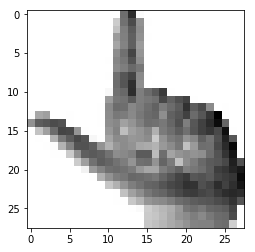

In [5]:
plt.imshow(X_train[200].reshape(28, 28),cmap='Greys')
Y_train[200]

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])

('x_train shape:', (6750, 28, 28, 1))
('Number of images in x_train', 6750)
('Number of images in x_test', 750)


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.8))
model.add(Dense(24,activation=tf.nn.softmax))

Using TensorFlow backend.


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=Y_train, epochs=12)

Epoch 1/12
6750/6750 [==============================] - 6s 860us/step - loss: 1.8070 - acc: 0.4455
Epoch 2/12
6750/6750 [==============================] - 4s 592us/step - loss: 0.7035 - acc: 0.7665
Epoch 3/12
6750/6750 [==============================] - 4s 589us/step - loss: 0.4439 - acc: 0.8487
Epoch 4/12
6750/6750 [==============================] - 4s 597us/step - loss: 0.3414 - acc: 0.8833
Epoch 5/12
6750/6750 [==============================] - 4s 595us/step - loss: 0.2760 - acc: 0.9009
Epoch 6/12
6750/6750 [==============================] - 4s 592us/step - loss: 0.2180 - acc: 0.9200
Epoch 7/12
6750/6750 [==============================] - 4s 628us/step - loss: 0.2140 - acc: 0.9249
Epoch 8/12
6750/6750 [==============================] - 5s 694us/step - loss: 0.1909 - acc: 0.9339
Epoch 9/12
6750/6750 [==============================] - 5s 708us/step - loss: 0.1772 - acc: 0.9336
Epoch 10/12
6750/6750 [==============================] - 4s 618us/step - loss: 0.1712 - acc: 0.9396
Epoch 11/

In [9]:
model.evaluate(X_test, Y_test)

750/750 [==============================] - 0s 311us/step


[0.007349594849084194, 0.9986666666666667]

In [1]:
from keras.models import load_model

model.save('sam_model.h5') 

Using TensorFlow backend.


NameError: name 'model' is not defined

In [1]:
from keras.models import load_model
model = load_model('sam_model.h5')

Using TensorFlow backend.


In [6]:
image_index = 6
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1,28, 28, 1))
print(pred.argmax())

NameError: name 'X_test' is not defined

100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


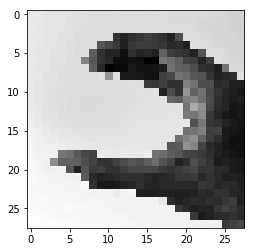

In [3]:
import matplotlib.image as mimage
TEST_DIR='TestData'
for img in tqdm(os.listdir(TEST_DIR)):
    #print(img)
    path = os.path.join(TEST_DIR,img)
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    #image=cv2.flip(image,1)
    image = cv2.bitwise_not(image)
    image = cv2.resize(image, (28,28))
    plt.imshow(image, cmap='Greys')
    

In [4]:
pred = model.predict(image.reshape(1,28, 28, 1))
print(pred.argmax())

17


In [10]:
alph=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','S','T','U','V','W','X','Y']

In [11]:
alph[pred.argmax()]

'C'

In [12]:
import numpy as np
import cv2
#import util as ut

cap = cv2.VideoCapture(0)
o=-1
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, img = cap.read() 

    #print(frame.rows)

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img=cv2.flip(img,1)
    img = cv2.rectangle(img,(400,100),(620,300),(0,255,0),3) #top left coordinates, bottom right coordinates, aestetics 
    img1=img[100:300,400:620]
    #img1=img
    img_ycrcb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)
    blur = cv2.GaussianBlur(img_ycrcb,(11,11),0)
    skin_ycrcb_min = np.array((0, 138, 67))
    skin_ycrcb_max = np.array((255, 173, 133))
    mask = cv2.inRange(blur, skin_ycrcb_min, skin_ycrcb_max)  # detecting the hand in the bounding box using skin detection
    resultBGR = cv2.bitwise_and(img1, img1, mask = mask)

    toPredict =  cv2.resize(resultBGR, (28,28))
    toPredict = cv2.cvtColor(toPredict,cv2.COLOR_BGR2GRAY)
    #print(toPredict.shape)
    
    
    contours,hierarchy = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, 2)
    #cnt=ut.getMaxContour(contours,4000)
    	
        
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (100,400)
    fontScale              = 1
    fontColor              = (255,255,255)
    lineType               = 2

    
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    pred = model.predict(toPredict.reshape(1,28, 28, 1))
    #print(pred.argmax())
    
    prev_o=o
    o=pred.argmax()
    
    if(o!=prev_o):
        print(o)
    
    letter=alph[o]
        
    cv2.putText(img,letter,bottomLeftCornerOfText,font,fontScale,fontColor,lineType)

    cv2.imshow('img',img)
    cv2.imwrite("out.jpg", img)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

2
3
2
20
2
3
2
3
2
3
2
13
0
3
12
10
6
1
3
2
6
2
10
2
15
6
20
2
15
2
7
2
20
10
6
10
2
6
2
15
2
10
6
10
2
13
10
15
10
3
10
15
10
15
13
3
15
13
3
10
15
3
15
13
10
15
10
3
10
6
10
3
10
2
10
2
10
3
10
3
15
10
3
15
3
15
6
15
3
13
15
7
2
10
0
10
2
3
2
0
2
12
2
10
6
2
9
2
8
2
3
15
0
2
15
3
15
2
15
12
2
13
3
2
13
3
12
10
12
15
10
15
10
15
2
3
2
3
7
10
7
2
3
1
7
3
11
7
2
7
11
7
0
7
11
7
2
7
3
13
2
3
2
3
2
15
2
6
15
12
3
12
15
3
10
15
3
15
3
10
3
15
3
10
0
15
3
15
3
15
10
15
10
15
10
15
10
15
10
15
10
15
10
15
10
15
10
3
15
2
13
2
13
2
13
2
15
3
2
8
2
15
2
11
2
3
13
3
14
13
2
13
2
11
7
2
0
2
11
2
13
3
10
15
10
15
13
2
15
6
2
6
15
10
15
13
15
10
15
10
15
10
6
13
6
2
6
15
6
15
6
3
2
3
2
3
2


In [ ]:
''' 1.train on colour
    2.higher dimension
    3.Model more complex
    4.5 frame output
'''